## Data Review / Analytic

Review data used for the ai model to build for the support app

#### Data Import

Importing the csv data into a dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/twcs.csv")

#### Basic Information

Review basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [4]:
df.head(20)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [5]:
df.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

#### Data Distribution 

Review basic data distrubution from the given dataset

##### Authors

Review the top authors id from the dataset

In [6]:
author_id_count = df['author_id'].value_counts()

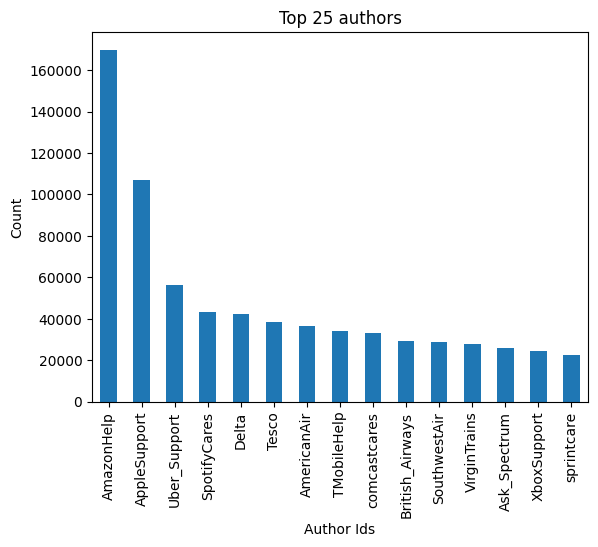

In [7]:
author_id_count[:15].plot(kind='bar')
plt.xlabel("Author Ids")
plt.ylabel("Count")
plt.title("Top 25 authors")
plt.show()

Review 5 samples from the a few of the authors

In [8]:
df[df['author_id'] == 'AmazonHelp'].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
181,269,AmazonHelp,False,Wed Nov 22 09:23:01 +0000 2017,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0
184,273,AmazonHelp,False,Wed Nov 22 09:40:27 +0000 2017,@115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...,274,271.0
186,275,AmazonHelp,False,Wed Nov 22 10:06:26 +0000 2017,@115770 恐れ入ります。至らない点も多々あるかとは存じますが、今後ともどうぞよろしくお...,NaN,274.0
234,324,AmazonHelp,False,Wed Nov 22 09:06:00 +0000 2017,@115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端末の...,NaN,325.0
321,615,AmazonHelp,False,Tue Oct 31 22:29:00 +0000 2017,@115820 I'm sorry we've let you down! Without ...,616,617.0


In [9]:
df[df['author_id'] == 'AppleSupport'].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,Tue Oct 31 22:26:49 +0000 2017,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
403,703,AppleSupport,False,Tue Oct 31 22:09:52 +0000 2017,@115855 Any steps tried since it started last ...,702,704.0
405,705,AppleSupport,False,Tue Oct 31 21:57:00 +0000 2017,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0


##### Inbound 

Review the inbound 

In [10]:
inbound_count = df["inbound"].value_counts()

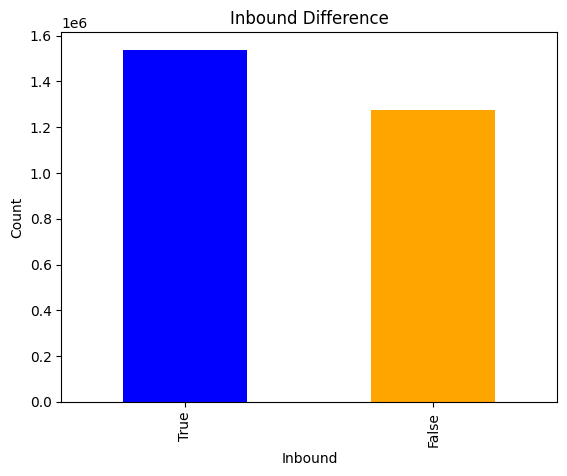

In [11]:
inbound_count.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Inbound")
plt.ylabel("Count")
plt.title("Inbound Difference")
plt.show()

Interesting to see the inbound are pretty similar 

Next we need to check the if the inbound is consistent with the author

In [12]:
inbound_count_true = df[df['inbound'] == True]
inbound_count_true = inbound_count_true["author_id"].value_counts()

In [13]:
inbound_count_false = df[df["inbound"] == False]
inbound_count_false = inbound_count_false["author_id"].value_counts()

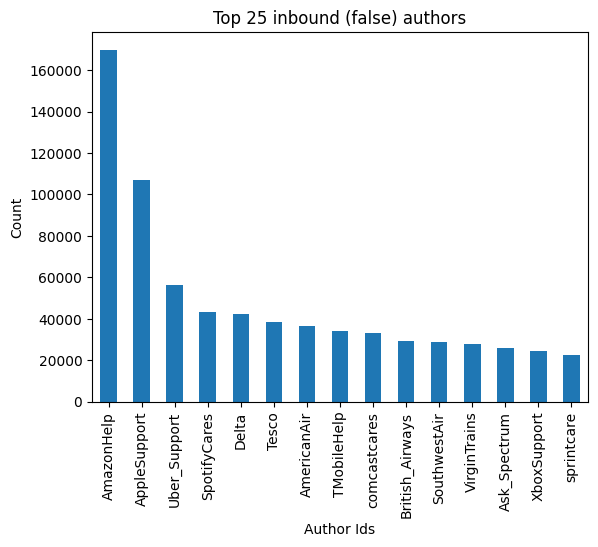

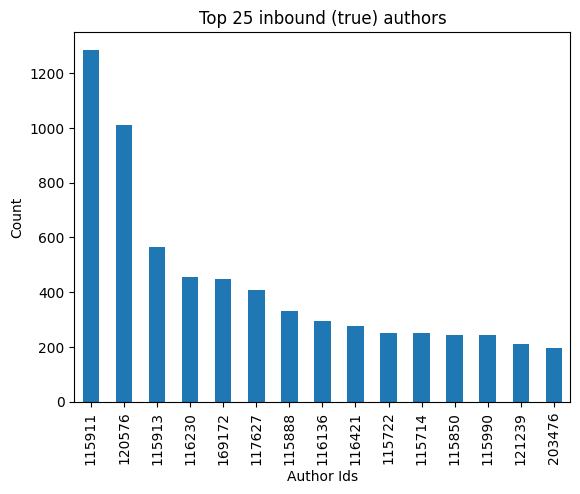

In [14]:
inbound_count_false[:15].plot(kind='bar')
plt.xlabel("Author Ids")
plt.ylabel("Count")
plt.title("Top 25 inbound (false) authors")
plt.show()

inbound_count_true[:15].plot(kind='bar')
plt.xlabel("Author Ids")
plt.ylabel("Count")
plt.title("Top 25 inbound (true) authors")
plt.show()

It does appear the inbound true vs false have similar authors.

Review a couple of inbound samples

In [15]:
df[df['inbound'] == True].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0


In [16]:
df[df['inbound'] == False].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


##### Response Tweet Id

Review the responds tweet id

Lets look into the nan values the for the response tweet id. These might be customer support messages the support agent never responded back.

In [17]:
response_tweet_id_nan = df[df['response_tweet_id'].isna()]

In [18]:
response_tweet_id_nan.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
13,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0
19,27,Ask_Spectrum,False,Tue Oct 31 22:21:26 +0000 2017,@115716 No thank you. ^JK,NaN,26.0
20,23,115716,True,Tue Oct 31 22:16:05 +0000 2017,@Ask_Spectrum The correct way to do it is via ...,NaN,21.0


In [19]:
response_tweet_id_nan.iloc[0]

tweet_id                                                               2
author_id                                                         115712
inbound                                                             True
created_at                                Tue Oct 31 22:11:45 +0000 2017
text                       @sprintcare and how do you propose we do that
response_tweet_id                                                    NaN
in_response_to_tweet_id                                              1.0
Name: 1, dtype: object

In [20]:
df[df['tweet_id'] == 1]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0


In [21]:
df[df['tweet_id'] == 3]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0


Looks like the converstation has ended from the nan values found. However looks like the time is decreasing as each tweet is tracked.

We will want to find the first initial support requeset. 

##### In response to tweet

Looks like the "in response to tweet id" is related the ongoing conversation of the customer support agent. Additional review to determine what is going on with this data.

In [25]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


Lets look at the NaN values for the in reponse to tweet id

In [23]:
in_response_to_tweet_nan = df[df["in_response_to_tweet_id"].isna()]

In [26]:
in_response_to_tweet_nan.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN


These could be the inital converstation to start off the support request. Lets compare the difference between in reponse to vs reponse tweet id. We are specifically looking for the nan values for both from a single customer.

In [29]:
in_response_to_tweet_nan[in_response_to_tweet_nan['author_id'] == '115712']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
753,1293,115712,True,Tue Oct 31 22:24:51 +0000 2017,@115714 @sprintcare how can I get in touch wit...,"1291,1296,1297",NaN
2301,3188,115712,True,Tue Oct 31 22:43:47 +0000 2017,@116447 - And the issue is still not fixed! N...,3187,NaN


In [30]:
response_tweet_id_nan[response_tweet_id_nan['author_id'] == '115712']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
752,1295,115712,True,Tue Oct 31 22:34:55 +0000 2017,@sprintcare I sent it twice now to apparently ...,NaN,1294.0
2314173,7,115712,True,Tue Oct 31 21:47:48 +0000 2017,@sprintcare the only way I can get a response ...,NaN,6.0


From comparing the two, the nan values for the in_response_to_tweet_id is the start of the conversation or complaint by the customer. All examples above date before the reponse tweet was taken.

In [34]:
print(f"Number of support request by customers: {len(in_response_to_tweet_nan)}")

Number of support request by customers: 794335


### Link customer request to support

Due to support request not directly linked to the correct customer. We will need to create a new dataframe that can link customer messages to the support group.

Because of the knowledge learned, grab the initial request from the nan from in response to tweet

In [35]:
initial_support_request_df = df[df['in_response_to_tweet_id'].isna()]

In [36]:
initial_support_request_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN


Test out the process before creating a funciton to loop though all of the author ids

In [49]:
example_df = initial_support_request_df.iloc[1]

reponse tweet id can have multiple tweets linked. Additional work will required to pull a single tweet id from the list

In [44]:
response_id = int(initial_support_request_df['response_tweet_id'].iloc[1])

In [50]:
found_team = df[df['tweet_id'] == response_id]['author_id'].values[0]

In [51]:
example_df['support_team'] = found_team

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_35134/3666726170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_df['support_team'] = found_team
/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_35134/3666726170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_df['support_team'] = found_team


In [52]:
example_df

tweet_id                                                                  18
author_id                                                             115713
inbound                                                                 True
created_at                                    Tue Oct 31 19:56:01 +0000 2017
text                       @115714 y’all lie about your “great” connectio...
response_tweet_id                                                         17
in_response_to_tweet_id                                                  NaN
support_team                                                      sprintcare
Name: 12, dtype: object

With the process complete. Next we need to create the function to update that column field value

In [ ]:
def responseTweetIdLookup(index_input):
    # Needs the index of the incoming dataframe for the reponse id
    # Preforms a lookup of the response tweet id from the orginal df
    # updates the column with the correct support team (incoming author id)
    found_response_tweet_id = initial_support_request_df['response_tweet_id'].iloc[index_input]